<a href="https://colab.research.google.com/github/BatuhanErTo/DeepLearningNotes/blob/master/MathmeticalBuildingBlocksOfDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras import layers

import numpy as np

import matplotlib.pyplot as plt

import time

####First look at a neural network

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8685 - loss: 0.4685
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9651 - loss: 0.1219
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9797 - loss: 0.0700
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9857 - loss: 0.0488
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9903 - loss: 0.0366


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([1.0663983e-06, 3.2527328e-08, 5.3210886e-05, 1.5819587e-03,
       6.3845773e-10, 4.4590308e-07, 2.1469510e-11, 9.9835050e-01,
       1.7822894e-06, 1.1081310e-05], dtype=float32)

In [ ]:
predictions[0].argmax()

np.int64(7)

In [ ]:
predictions[0][7]

np.float32(0.9983505)

In [ ]:
test_labels[0]

np.uint8(7)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0757
Test accuracy: 0.9787999987602234


####Data representations for neural networks

In [ ]:
# Scalars (rank-0 tensors)
x = np.array(12)
x.ndim

0

In [ ]:
# Vectors (rank-1 tensors)
x = np.array([12, 3, 6, 14, 7])
x.ndim

1

In [ ]:
# Matrices (rank-2 tensors)
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [ ]:
x.shape

(3, 5)

In [ ]:
# Rank-3 tensor
x = np.array([[[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]]])
x.ndim

3

In [ ]:
x.shape

(3, 3, 5)

####Key attributes

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

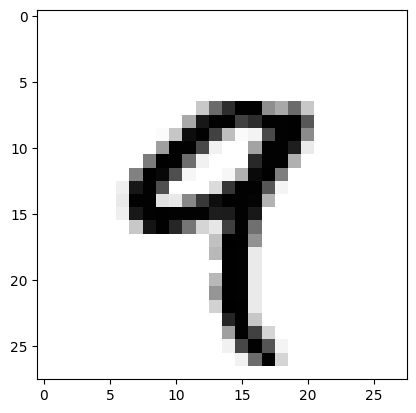

In [ ]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

np.uint8(9)

####Manipulating tensors in NumPy

In [ ]:
# select 14 × 14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]

In [ ]:
# crop the images to patches of 14 × 14 pixels centered in the middle
my_slice = train_images[:, 7:-7, 7:-7]

####Tensor Operations

In [ ]:
# element-wise operations

def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [ ]:
# calculate execution duration of element wise operations
# by NumPy built-in func
x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.0)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
# calculate execution duration of element wise operations
# by custom func that was created 2 cell above
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 3.66 s


In [ ]:
# Broadcasting
x = np.random.random((32, 10))
y = np.random.random((10,))

y

array([0.11941728, 0.47942566, 0.31057275, 0.17250064, 0.58913242,
       0.45243128, 0.13648678, 0.05268721, 0.27195317, 0.13414259])

In [ ]:
y.shape

(10,)

In [ ]:
y = np.expand_dims(y, axis=0)
y

array([[0.11941728, 0.47942566, 0.31057275, 0.17250064, 0.58913242,
        0.45243128, 0.13648678, 0.05268721, 0.27195317, 0.13414259]])

In [ ]:
Y = np.tile(y, (32,1))
Y.shape

(32, 10)

In [ ]:
# important note about broadcasting
# The repetition operation is entirely virtual:
# it happens at the algorithmic level rather than at the memory level.

In [ ]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [ ]:
# Numpy function called maximum() applies this operation on different tensors
# via broadcasting
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [ ]:
# tensor product

x = np.random.random((32,))
y = np.random.random((32,))

z = np.matmul(x, y)
z

np.float64(8.948476485814787)

In [ ]:
z = x @ y
z

np.float64(8.904300865840325)

In [ ]:
def naive_vector_product(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.0
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [ ]:
naive_vector_product(x, y)

np.float64(8.948476485814785)

In [ ]:
def naive_matrix_vector_product(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x_shape_at_zero = x.shape[0]

  z = np.zeros(x_shape_at_zero)

  for i in range(x_shape_at_zero):
      z[i] = naive_vector_product(x[i, :], y)
  return z

In [ ]:
x = np.random.random((5,10))
y = np.random.random((10,))
naive_matrix_vector_product(x, y)

array([1.77265194, 2.80021321, 2.27816822, 2.01386106, 2.43558423])

In [ ]:
def naive_matrix_product(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  x_row_size = x.shape[0]
  x_column_size = x.shape[1]
  y_row_size = y.shape[0]
  y_column_size = y.shape[1]

  z = np.zeros((x_row_size, y_column_size))

  for i in range(x_row_size):
    for j in range(y_column_size):
        row_x = x[i, :]
        column_y = y[:, j]
        z[i, j] = naive_vector_product(row_x, column_y)
  return z

In [ ]:
# (a, b, c, d) • (d,) -> (a, b, c)
# (a, b, c, d) • (d, e) -> (a, b, c, e)
# above rules, explains dot product result shape logic

In [ ]:
# Tensor Reshaping
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.reshape((6,1))

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x.reshape((2,3))

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
# Geometric interpretation of tensor operations

####The engine of neural networks: Gradient-based optimization